## Imports

In [1]:
from PyDAQmx import *
import numpy as np
import time
from ctypes import *
import matplotlib.pyplot as plt

## Counter


In [7]:
try:
    Counter.StopTask()
    Counter.ClearTask()
    Clock.StopTask()
    Clock.ClearTask()
except:
    pass


Counter = Task()
Clock = Task()

read = c_ulong()
read2 = c_uint64()
rate = 1000
n_samples = 1000
duty_cycle = 0.5
period = 0.02

my_clock_channel = '/Dev2/Ctr0'
# Create channel to generate digital pulses that freq and dutyCycle define and adds the channel to the task
Clock.CreateCOPulseChanFreq(my_clock_channel,  #  The name of the counter to use to create virtual channels
                            "myClockTask", # The name to assign to the created virtual channel
                            DAQmx_Val_Hz, # The units in which to specify freq.
                            DAQmx_Val_Low, # The resting state of the output terminal.
                            0.0, # The amount of time in seconds to wait before generating the first pulse.
                            1/float(period), # The frequency at which to generate pulses.
                            duty_cycle, # The width of the pulse divided by the pulse period.
                           )

# Sets only the number of samples to acquire or generate without specifying timing. 
Clock.CfgImplicitTiming(
    DAQmx_Val_ContSamps, # Acquire or generate samples until you stop the task.
    1000 # the buffer size
)

Clock.StartTask()

### TEST HERE FROM QUDI


# Creates a channel to measure the time between state transitions of a digital signal 
ch = '/Dev2/Ctr1'
Counter.CreateCISemiPeriodChan(
                    ch,# use this counter channel. The name of the counter to use to create virtual channels.
                    'Counter Channel 1', #The name to assign to the created virtual channel.
                    0, # Expected minimum count value
                    5,# Expected maximum count value
    
                    DAQmx_Val_Ticks, # The units to use to return the measurement. Here are timebase ticks
                    ''# customScaleName, in case of different units(DAQmx_Val_FromCustomScale).
)



# Set the Counter Input to a Semi Period input Terminal.
# Connect the pulses from the counter clock to the counter channel
        
# Specifies the input terminal of the signal to measure.
Counter.SetCISemiPeriodTerm( 
                        ch,# assign a named Terminal
                        '/Dev2/Ctr0' + 'InternalOutput') 

# Specifies the terminal of the timebase to use for the counter
Counter.SetCICtrTimebaseSrc(ch, 
                    '/Dev2/PFI0')

Counter.CfgImplicitTiming(DAQmx_Val_ContSamps, # Sample Mode: Acquire or generate samples until you stop the task.
                    1000 # buffer length which stores  temporarily the number of generated samples
)
try:
    Counter.StartTask()
except Exception as e:
    print(e)
    Clock.StopTask()
    Clock.ClearTask()

_RWTimeout = 2
### Read the Data from the Counter
n_read_samples = int32()
samples = 100
count_data = np.empty((1, 2 * samples), dtype=np.uint32)
Counter.ReadCounterU32(2 * samples,
                    # maximal timeout for the read process
                    _RWTimeout,
                    # write the readout into this array
                    count_data[0],
                    # length of array to write into
                    2 * samples,
                    # number of samples which were read
                    byref(n_read_samples),
                    # Reserved for future use. Pass NULL (here None) to this parameter
                    None)
print(count_data)
Counter.StopTask()
Counter.ClearTask()
Clock.StopTask()
Clock.ClearTask()

[[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
  1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
  1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
  1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
  1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
  1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]]


## Analog Input

Acquired 1000 points


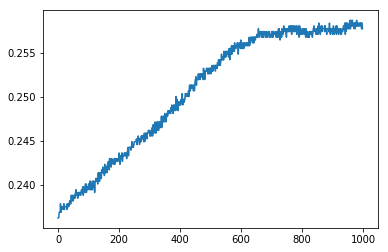

In [10]:

analog_input = Task()
read = int32()
data = np.zeros((999,), dtype=np.float64)

# DAQmx Configure Code
analog_input.CreateAIVoltageChan("Dev2/ai0","",DAQmx_Val_Cfg_Default,-10.0,10.0,DAQmx_Val_Volts,None)
analog_input.CfgSampClkTiming("",10000.0,DAQmx_Val_Rising,DAQmx_Val_FiniteSamps,1000)

# DAQmx Start Code
analog_input.StartTask()

# DAQmx Read Code
analog_input.ReadAnalogF64(1000,10.0,DAQmx_Val_GroupByChannel,data,1000,byref(read),None)

print ("Acquired %d points"%read.value)
plt.plot(data)


## Analog Output

In [2]:
from PyDAQmx import *
import numpy as np
import time
from ctypes import *
import matplotlib.pyplot as plt


task = Task()
task.CreateAOVoltageChan("Dev4/ao0","a_ch1",-10.0,10.0,DAQmx_Val_Volts,'')
value = 1
task.StartTask()
task.WriteAnalogScalarF64(1,10.0,value,None)
# value = 0
# task.WriteAnalogScalarF64(1,10.0,value,None)
task.StopTask()




## Triggered Analog Output (Scanner)

In [1]:
import PyDAQmx as daq
import numpy as np
import time
from ctypes import *
import matplotlib.pyplot as plt

clock_channel = '/Dev4/Ctr0'


voltages = np.array([0.0,1.0]*200)
# voltages = np.linspace(-2,2,200)

Clock = daq.Task()
duty_cycle = 0.5
period = 0.1
Clock.CreateCOPulseChanFreq(clock_channel,  #  The name of the counter to use to create virtual channels
                            "myClockTask", # The name to assign to the created virtual channel
                            daq.DAQmx_Val_Hz, # The units in which to specify freq.
                            daq.DAQmx_Val_Low, # The resting state of the output terminal.
                            0.0, # The amount of time in seconds to wait before generating the first pulse.
                            1/float(period), # The frequency at which to generate pulses.
                            duty_cycle, # The width of the pulse divided by the pulse period.
                           )

# Sets only the number of samples to acquire or generate without specifying timing. 
Clock.CfgImplicitTiming(
    daq.DAQmx_Val_ContSamps, # Acquire or generate samples until you stop the task.
    1000 # the buffer size
)
Clock.StartTask()


master = daq.TaskHandle()
daq.DAQmxCreateTask('MasterTask', daq.byref(master))
ch_master = '/Dev4/ao0'

daq.DAQmxCreateAOVoltageChan(
    # The AO voltage operation function is assigned to this task.
    master,
    # use (all) scanner ao_channels for the output
    ch_master,
    # assign a name for that channel
    'Scanner AO Channel master',
    # minimum possible voltage
    -5,
    # maximum possible voltage
    5,
    # units is Volt
    daq.DAQmx_Val_Volts,
    # empty for future use
    '')

daq.DAQmxCfgSampClkTiming(
    # add to this task
    master,
    # use this channel as clock
    'Ctr0InternalOutput',
    # Maximum expected clock frequency
    10,
    # Generate sample on falling edge
    daq.DAQmx_Val_Rising,
    # generate finite number of samples
    daq.DAQmx_Val_FiniteSamps,
    # number of samples to generate
    len(voltages))


# daq.DAQmxCfgDigEdgeStartTrig(
#     master, 
#     'Ctr0InternalOutput' ,
#     daq.DAQmx_Val_Rising)


_AONwrittenMaster = daq.int32()

# daq.DAQmxSetSampTimingType(master, daq.DAQmx_Val_OnDemand)
# daq.DAQmxSetSampTimingType(master, daq.DAQmx_Val_SampClk)



daq.WriteAnalogF64(
            # write to this task
            master,
            # length of the command (points)
            len(voltages),
            # start task immediately (True), or wait for software start (False)
            False,
            # maximal timeout in seconds for# the write process
            20,
            # Specify how the samples are arranged: each pixel is grouped by channel number
            daq.DAQmx_Val_GroupByChannel,
            # the voltages to be written
            voltages,
            # The actual number of samples per channel successfully written to the buffer
            daq.byref(_AONwrittenMaster),
            # Reserved for future use. Pass NULL(here None) to this parameter
            None)
daq.DAQmxStartTask(master)

# Clock.StopTask()

print(_AONwrittenMaster)
print('ddd')

c_long(400)
ddd


## Two synchronized analog outputs

In [ ]:
import PyDAQmx as daq
import numpy as np
import time
from ctypes import *
import matplotlib.pyplot as plt

master = daq.TaskHandle()
slave = daq.TaskHandle()
daq.DAQmxCreateTask('MasterTask', daq.byref(master))
daq.DAQmxCreateTask('SlaveTask', daq.byref(slave))


ch_master = '/Dev4/ao0'
ch_slave = '/Dev3/ao0'
# clock_channel_slave = '/Dev3/PFI7'
# trig_source_ch = 'Dev3/ao/StartTrigger'

voltages = np.array([0.0,1.0]*100)

#=========Create clock channel on Dev4/Ctr0

clock = daq.TaskHandle()
# Clock = daq.Task()
duty_cycle = 0.5
period = 0.02
clock_channel = '/Dev4/Ctr0'

daq.DAQmxCreateAOVoltageChan(
    # The AO voltage operation function is assigned to this task.
    master,
    # use (all) scanner ao_channels for the output
    ch_master,
    # assign a name for that channel
    'Scanner AO Channel master',
    # minimum possible voltage
    -5,
    # maximum possible voltage
    5,
    # units is Volt
    daq.DAQmx_Val_Volts,
    # empty for future use
    '')



daq.DAQmxCreateTask('myClockTask', daq.byref(clock))
# Create channel to generate digital pulses that freq and dutyCycle define and adds the channel to the task
daq.DAQmxCreateCOPulseChanFreq(
    clock,
    clock_channel,  #  The name of the counter to use to create virtual channels
    "myClockChannel", # The name to assign to the created virtual channel
    daq.DAQmx_Val_Hz, # The units in which to specify freq.
    daq.DAQmx_Val_Low, # The resting state of the output terminal.
    0.0, # The amount of time in seconds to wait before generating the first pulse.
    1/float(period), # The frequency at which to generate pulses.
    duty_cycle, # The width of the pulse divided by the pulse period.
   )


daq.DAQmxCfgSampClkTiming(
    # add to this task
    master,
    # use this channel as clock
    'Ctr0InternalOutput',
    # Maximum expected clock frequency
    1250,
    # Generate sample on falling edge
    daq.DAQmx_Val_Rising,
    # generate finite number of samples
    daq.DAQmx_Val_FiniteSamps,
    # number of samples to generate
    len(voltages))





daq.DAQmxCreateAOVoltageChan(
    # The AO voltage operation function is assigned to this task.
    slave,
    # use (all) scanner ao_channels for the output
    ch_slave,
    # assign a name for that channel
    'Scanner AO Channel slave',
    # minimum possible voltage
    -5,
    # maximum possible voltage
    5,
    # units is Volt
    daq.DAQmx_Val_Volts,
    # empty for future use
    '')




daq.DAQmxCfgSampClkTiming(
    # add to this task
    slave,
    # use this channel as clock
    '/Dev4/Ctr0InternalOutput',
    # Maximum expected clock frequency
    1250,
    # Generate sample on falling edge
    daq.DAQmx_Val_Rising,
    # generate finite number of samples
    daq.DAQmx_Val_FiniteSamps,
    # number of samples to generate
    len(voltages))



# Sets only the number of samples to acquire or generate without specifying timing. 
daq.DAQmxCfgImplicitTiming(
    clock,
    daq.DAQmx_Val_ContSamps, # Acquire or generate samples until you stop the task.
    1000 # the buffer size
)

# daq.DAQmxCfgOutputBuffer(slave,len(volages))

daq.DAQmxStartTask(clock)
daq.DAQmxSetSampTimingType(master, daq.DAQmx_Val_SampClk)
daq.DAQmxSetSampTimingType(slave, daq.DAQmx_Val_SampClk)

# daq.DAQmxSetSampTimingType(master, daq.DAQmx_Val_OnDemand )
# daq.DAQmxSetSampTimingType(slave, daq.DAQmx_Val_OnDemand )

_AONwrittenMaster = daq.int32()
_AONwrittenSlave = daq.int32()




daq.WriteAnalogF64(
            # write to this task
            slave,
            # length of the command (points)
            len(voltages),
            # start task immediately (True), or wait for software start (False)
            False,
            # maximal timeout in seconds for# the write process
            20,
            # Specify how the samples are arranged: each pixel is grouped by channel number
            daq.DAQmx_Val_GroupByChannel,
            # the voltages to be written
            voltages,
            # The actual number of samples per channel successfully written to the buffer
            daq.byref(_AONwrittenSlave),
            # Reserved for future use. Pass NULL(here None) to this parameter
            None)
daq.DAQmxStartTask(slave)





daq.WriteAnalogF64(
            # write to this task
            master,
            # length of the command (points)
            len(voltages),
            # start task immediately (True), or wait for software start (False)
            False,
            # maximal timeout in seconds for# the write process
            20,
            # Specify how the samples are arranged: each pixel is grouped by channel number
            daq.DAQmx_Val_GroupByChannel,
            # the voltages to be written
            voltages,
            # The actual number of samples per channel successfully written to the buffer
            daq.byref(_AONwrittenMaster),
            # Reserved for future use. Pass NULL(here None) to this parameter
            None)

daq.DAQmxStartTask(master)

print('ddd')



## TESTS

In [1]:
from PyDAQmx import *
import PyDAQmx as daq
import numpy as np
import time
from ctypes import *
import matplotlib.pyplot as plt


task = Task()
task.CreateAOVoltageChan("Dev4/ao0","a_ch1",-10.0,10.0,DAQmx_Val_Volts,'')
voltages =np.array( [0.0,0.0])

_AONwritten = daq.int32()

task.WriteAnalogF64(
    # length of the command (points)
    len(voltages),
    # start task immediately (True), or wait for software start (False)
    False,
    # maximal timeout in seconds for# the write process
    20,
    # Specify how the samples are arranged: each pixel is grouped by channel number
    daq.DAQmx_Val_GroupByChannel,
    # the voltages to be written
    voltages,
    # The actual number of samples per channel successfully written to the buffer
    daq.byref(_AONwritten),
    # Reserved for future use. Pass NULL(here None) to this parameter
    None)
task.StartTask()

task.StopTask()


# daq.WriteAnalogF64(
#             # write to this task
#             master,
#             # length of the command (points)
#             len(voltages),
#             # start task immediately (True), or wait for software start (False)
#             False,
#             # maximal timeout in seconds for# the write process
#             20,
#             # Specify how the samples are arranged: each pixel is grouped by channel number
#             daq.DAQmx_Val_GroupByChannel,
#             # the voltages to be written
#             voltages,
#             # The actual number of samples per channel successfully written to the buffer
#             daq.byref(_AONwrittenMaster),
#             # Reserved for future use. Pass NULL(here None) to this parameter
#             None)



CannotWriteWhenAutoStartFalseAndTaskNotRunningError: Write cannot be performed when the auto start input to DAQmx Write is false, task is not running, and timing for the task is not configured or Timing Type is set to On Demand.

Set auto start to true, start the task, or configure timing and specify Timing Type other than On Demand.
Task Name: _unnamedTask<0>

Status Code: -200846
 in function DAQmxWriteAnalogF64

In [17]:
sum(count_data[0])

2000

In [ ]:
from PyDAQmx.DAQmxFunctions import *
from PyDAQmx.DAQmxConstants import *

class ContinuousPulseTrainGeneration():
    """ Class to create a continuous pulse train on a counter
    
    Usage:  pulse = ContinuousTrainGeneration(period [s],
                duty_cycle (default = 0.5), counter (default = "dev1/ctr0"),
                reset = True/False)
            pulse.start()
            pulse.stop()
            pulse.clear()
    """
    def __init__(self, period=1., duty_cycle=0.5, counter="Dev2/ctr0", reset=False):
        if reset:
            DAQmxResetDevice(counter.split('/')[0])
        taskHandle = TaskHandle(0)
        DAQmxCreateTask("",byref(taskHandle))
        DAQmxCfgAnlgEdgeStartTrig(taskHandle,'Dev2/ctr0',PyDAQmx.DAQmx_Val_RisingSlope, 60e-3)

        
        DAQmxCfgImplicitTiming(taskHandle,DAQmx_Val_ContSamps,1000)
        
        
        self.taskHandle = taskHandle
    def start(self):
        DAQmxStartTask(self.taskHandle)
    def stop(self):
        DAQmxStopTask(self.taskHandle)
    def clear(self):
        DAQmxClearTask(self.taskHandle)


if __name__=="__main__":
    pulse_gene1 = ContinuousPulseTrainGeneration(1,0.3, "Dev2/ctr0", reset=True)
    pulse_gene1.start()
    a = input("Generating pulse train. Press Enter to interrupt\n")
    pulse_gene1.stop()
    pulse_gene1.clear()
   

